In [35]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter

In [36]:
def pallete_bann(df,coluna,pallete_cor):
    pal = sns.color_palette(pallete_cor, len(df))
    rank = df[coluna].argsort().argsort() 
    pallete = np.array(pal[::-1])[rank]
    
    return pallete

In [ ]:
folder = r'C:\Program Files'

In [37]:
arquivos = []
tamanhos = []
acessos = []

for (dirpath, dirnames, filenames) in os.walk(folder):
    
    for f in filenames:
        
        try:
            arquivo = os.path.join(dirpath, f)
            info = os.stat(arquivo)
            acesso = datetime.datetime.fromtimestamp(info.st_atime)
            tamanho = info.st_size
            arquivos.append(arquivo)
            tamanhos.append(tamanho)
            acessos.append(acesso)
        except FileNotFoundError:
            #print('Sem acesso: ',dirpath)
            None
        
df = pd.DataFrame()
df['files'] = arquivos
df['size'] = tamanhos
df['acessos'] = acessos

df['size'] = df['size']/1000000 # convert to MB
df = df.sort_values('size', ascending=False)

df_o = df[:20] # get the biggest 20 files

In [38]:
df = df_o
df.head(2)

,files,size,acessos
509,C:\Program Files\Google\Chrome\Application\92....,255.384496,2021-07-20 18:13:02.912636
486,C:\Program Files\Google\Chrome\Application\92....,169.406632,2021-07-20 18:13:19.835700


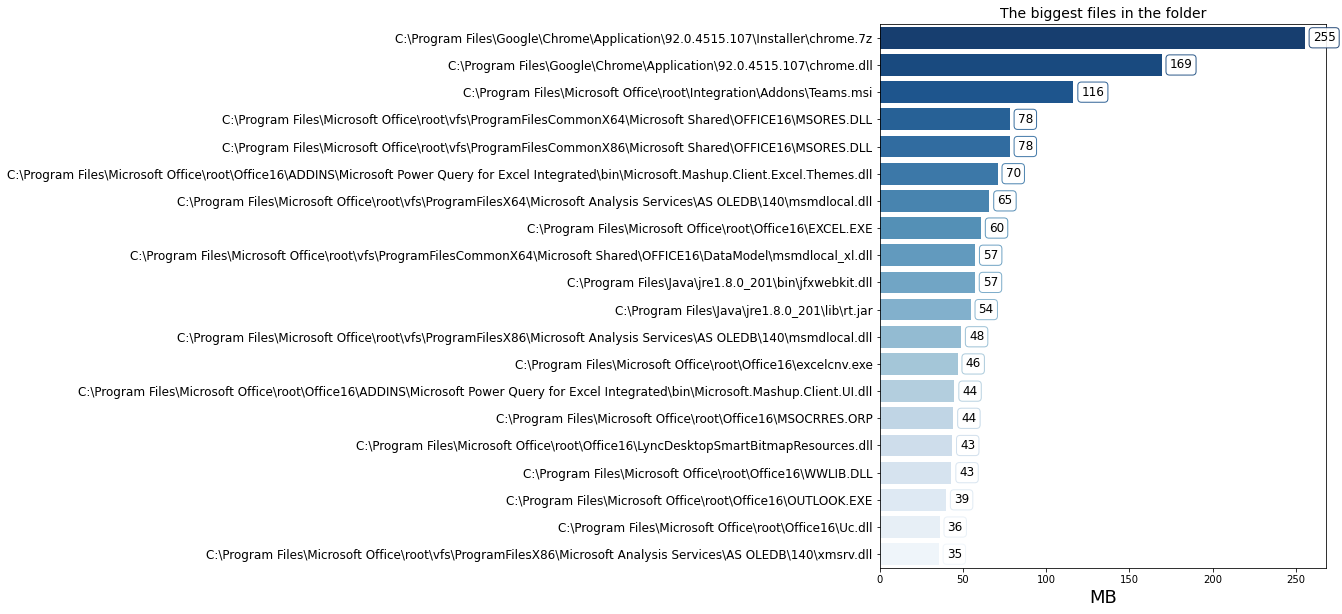

In [39]:
df = df_o

palette=pallete_bann(df,'size','Blues_r')

f, ax = plt.subplots(figsize=(8,10))
sns.barplot(x='size',y='files',data=df,ax=ax,palette=palette)



ax.set_yticklabels(ax.get_yticklabels(),rotation=0, ha='right', fontsize = 12)
titulo = 'The biggest files in the folder'
ax.set_title(titulo, fontsize=14)
ax.set_xlabel('MB', fontsize=18)
ax.set_ylabel('', fontsize=12)

     
for p in ax.patches:
    ax.annotate(p.get_width().astype(int), 
                   (p.get_width(),p.get_y() + p.get_height() / 2.), 
                   ha = 'left',
                   va = 'center', 
                   size=12,
                   xytext = (+8, 0), 
                   textcoords = 'offset points',
                   bbox=dict(boxstyle='round', fc='w',ec=p.get_facecolor(),alpha=0.9),                      
                  )